In [69]:
# import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [71]:
# load dataset

# Define the path to the saved file
file_path = os.path.expanduser("~/Documents/data/Clean_data.csv")

# Load the cleaned data
cleaned_data = pd.read_csv(file_path)



In [73]:
cleaned_data.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0


In [75]:
# Split data to numerical and categorical analysis

numerical_df = cleaned_data.select_dtypes(exclude = "object")
categorical_df = cleaned_data.select_dtypes(include = "object")

In [77]:
numerical_df.head(3)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0


In [81]:
categorical_df.head(3)

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never


### Univariante Analysis

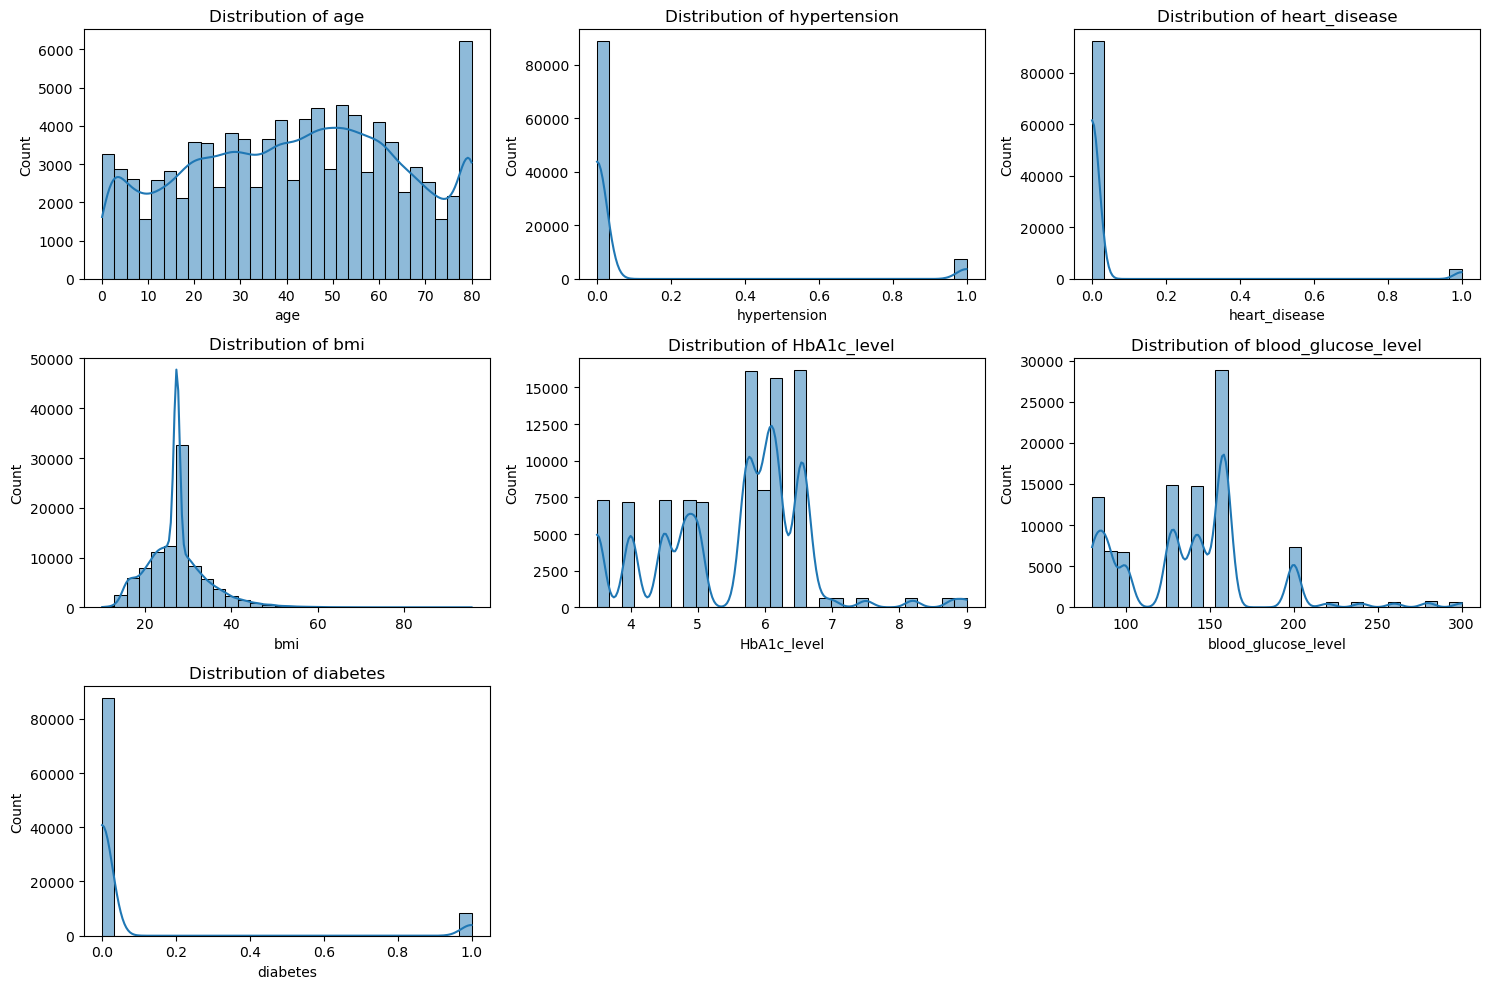

In [83]:
# Histograms for numerical columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_df, 1):
    plt.subplot(3, 3, i)
    sns.histplot(cleaned_data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

### Observation¶
The distributions of binary features like hypertension, heart_disease, and diabetes show clear distinctions between the two categories, with one category often being more frequent than the other. Continuous features such as age, bmi, HbA1c_level, and blood_glucose_level exhibit varying shapes, with some being skewed or bimodal, indicating potential subgroups within the data. These patterns suggest that certain features may have a strong influence on the target variable (diabetes), which can be further explored through bivariate and multivariate analysis.

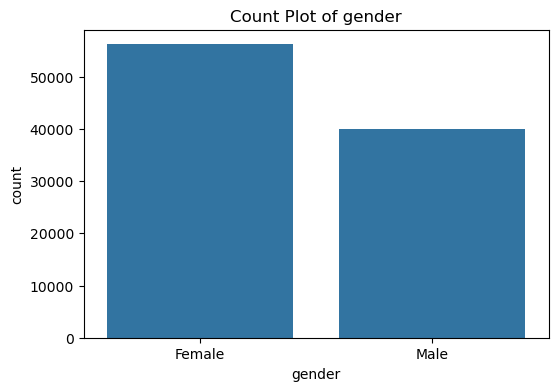

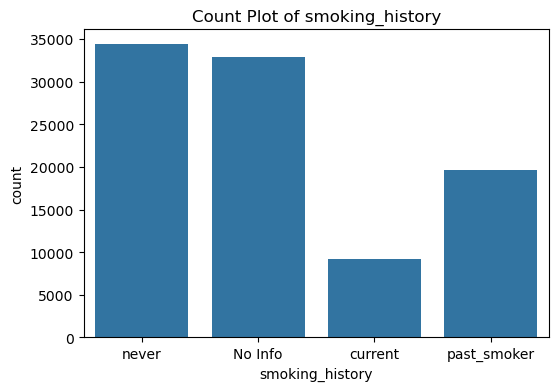

In [85]:
# Count plots for categorical columns
for column in categorical_df:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=cleaned_data)
    plt.title(f'Count Plot of {column}')
    plt.show()

#### Observation¶
The dataset shows a gender imbalance, with females being more represented than males.

Smoking history is dominated by "never" smokers, but the "no info" category is substantial and may require special handling during data preprocessing.

### Bivariate Analysis

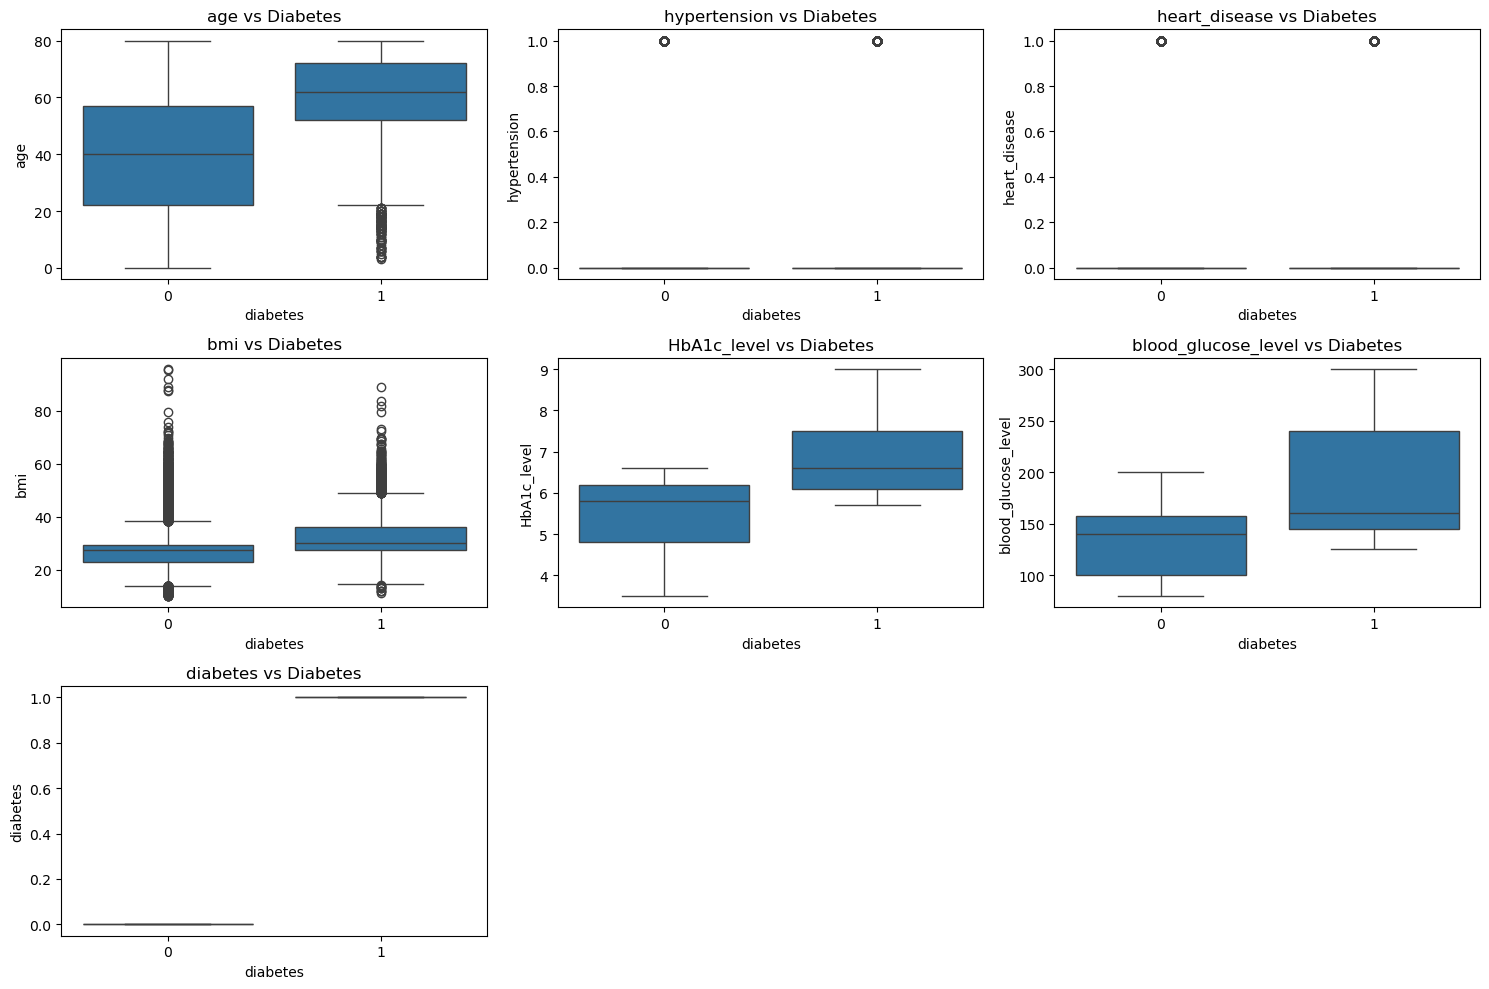

In [87]:
# Numerical Columns vs Target (diabetes):

# Boxplots for numerical columns vs diabetes
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_df, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='diabetes', y=column, data=cleaned_data)
    plt.title(f'{column} vs Diabetes')
plt.tight_layout()
plt.show()

#### Observation¶
Individuals with diabetes tend to be older. Blood glucose and HbA1c levels show a strong distinction between diabetic and non-diabetic groups, making them key indicators of diabetes.

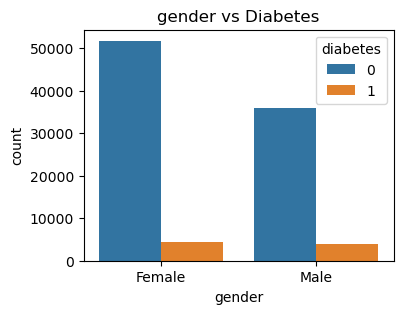

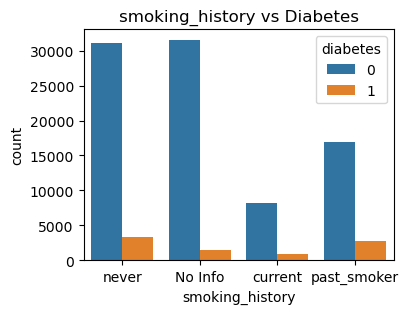

In [89]:
# Categorical Columns vs Target (diabetes):

# Count plots for categorical columns vs diabetes
for column in categorical_df:
    plt.figure(figsize=(4, 3))
    sns.countplot(x=column, hue='diabetes', data=cleaned_data)
    plt.title(f'{column} vs Diabetes')
    plt.show()

#### Observation
The bivariate analysis reveals that females(indicated by color bleu) have a higher count of both diabetic and non-diabetic cases compared to males, suggesting a potential gender-based trend in diabetes prevalence. For smoking history, individuals who "never" smoked or have "no info" dominate the dataset, with a noticeable proportion of non-diabetic cases, while "current" and "former" smokers show a smaller but significant presence of diabetic cases. This indicates that smoking history may play a role in diabetes risk, though further analysis is needed to confirm its significance.

### Multivariate Analysis¶

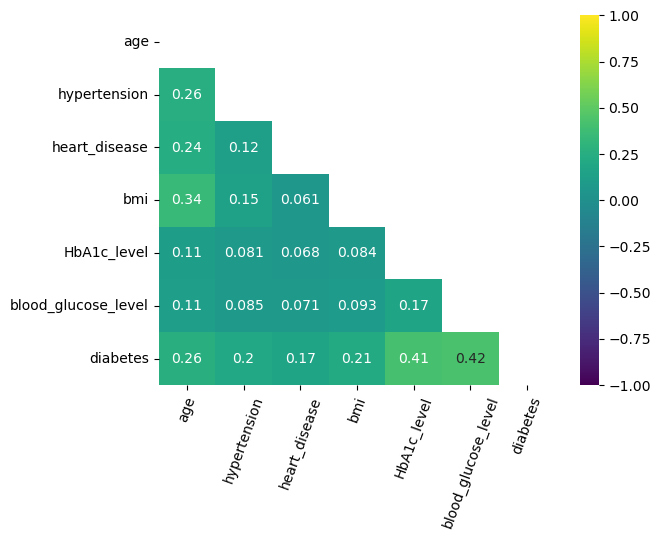

In [91]:
mask = np.triu(np.ones_like(numerical_df.corr(), dtype = bool))
sns.heatmap(data = numerical_df.corr(), cmap = "viridis", vmax=1, vmin=-1, annot = True, mask = mask)
plt.xticks(rotation = 70);

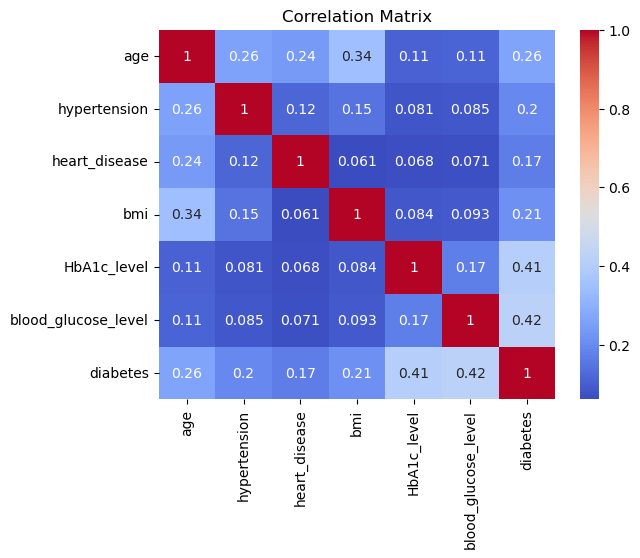

In [93]:
numeric_df = cleaned_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#### Observation
The correlation matrix indicates that **HbA1c_level** and **blood_glucose_level** have the strongest positive correlations with **diabetes** (0.41 and 0.42, respectively), suggesting these are key predictors for diabetes. **Age**, and **bmi** also show moderate positive correlations with diabetes, indicating they contribute to the risk. While  **hypertension**, and  **heart_disease** shows a weak correlation.